In [48]:
import sklearn.tree as tree
import sklearn.model_selection as skmodel
import sklearn.metrics as metrics
import imblearn.over_sampling as oversampling
import matplotlib.pyplot as plt
import pandas as pd
import collections as cl

In [49]:
data_regression = pd.read_csv("../preprocessed/regression_preprocessed.csv")
X_reg = data_regression.drop("price", axis=1)
Y_reg = data_regression.loc[:, "price"]
data_regression

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,5,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,4,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,2,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,4,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,3,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,4,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
data_classification = pd.read_csv("../preprocessed/classification_preprocessed.csv")
X_class = data_classification.drop("Win_Probability", axis=1)
Y_class = data_classification.loc[:, "Win_Probability"]
X_class, Y_class = oversampling.SMOTE().fit_resample(X_class, Y_class)
X_class.shape, Y_class.shape

((283935, 2), (283935,))

In [51]:
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = skmodel.train_test_split(X_reg, Y_reg)
X_class_train, X_class_test, Y_class_train, Y_class_test = skmodel.train_test_split(X_class, Y_class)

In [52]:
tree_regression_model = tree.DecisionTreeRegressor(max_depth=5).fit(X_reg_train, Y_reg_train)

tree_regression_prediction = tree_regression_model.predict(X_reg_test)

In [53]:
print(metrics.mean_absolute_error(Y_reg_test, tree_regression_prediction),
      metrics.r2_score(Y_reg_test, tree_regression_prediction),
      sep="\n")

657.7806565671037
0.9096250156003034


In [54]:
print(tree.export_text(tree_regression_model))

|--- feature_0 <= 1.00
|   |--- feature_0 <= 0.61
|   |   |--- feature_5 <= 4.99
|   |   |   |--- feature_4 <= 4.62
|   |   |   |   |--- feature_4 <= 4.30
|   |   |   |   |   |--- value: [578.64]
|   |   |   |   |--- feature_4 >  4.30
|   |   |   |   |   |--- value: [739.90]
|   |   |   |--- feature_4 >  4.62
|   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |--- value: [940.91]
|   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |--- value: [1198.79]
|   |   |--- feature_5 >  4.99
|   |   |   |--- feature_17 <= 0.50
|   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |--- value: [1843.90]
|   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |--- value: [1412.49]
|   |   |   |--- feature_17 >  0.50
|   |   |   |   |--- feature_0 <= 0.55
|   |   |   |   |   |--- value: [1133.91]
|   |   |   |   |--- feature_0 >  0.55
|   |   |   |   |   |--- value: [1277.10]
|   |--- feature_0 >  0.61
|   |   |--- feature_0 <= 0.89
|   |   |   |--- feature_5 <= 5.70
|   

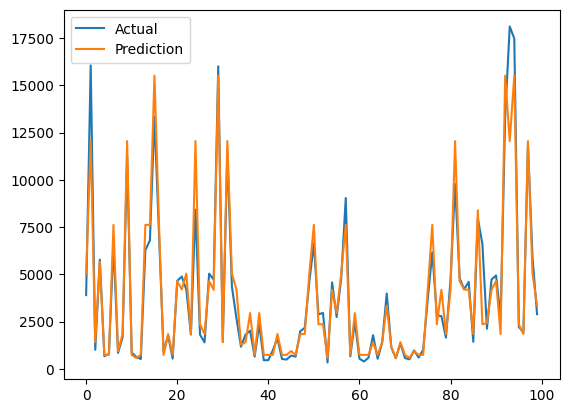

In [55]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(tree_regression_prediction[:100], label="Prediction");
plt.legend();

In [56]:
tree_classification_model = tree.DecisionTreeClassifier().fit(X_class_train, Y_class_train)

tree_classification_prediction = tree_classification_model.predict(X_class_test)

In [57]:
print(metrics.classification_report(Y_class_test.to_numpy(), tree_classification_prediction))

              precision    recall  f1-score   support

          -1       0.81      0.83      0.82     23687
           0       0.88      0.85      0.86     23706
           1       0.82      0.83      0.82     23591

    accuracy                           0.83     70984
   macro avg       0.83      0.83      0.83     70984
weighted avg       0.83      0.83      0.83     70984



In [58]:
print(tree.export_text(tree_classification_model))

|--- feature_0 <= 11.50
|   |--- feature_0 <= 10.50
|   |   |--- feature_0 <= 5.50
|   |   |   |--- feature_1 <= 2234.00
|   |   |   |   |--- feature_1 <= 765.00
|   |   |   |   |   |--- feature_1 <= 18.00
|   |   |   |   |   |   |--- class: -1
|   |   |   |   |   |--- feature_1 >  18.00
|   |   |   |   |   |   |--- feature_1 <= 271.00
|   |   |   |   |   |   |   |--- feature_1 <= 180.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  180.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  271.00
|   |   |   |   |   |   |   |--- feature_1 <= 355.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  355.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 419.00
|   |   |   |   |   |   |   |   |   |--- class: -1
|   |   |   |   |   |   |   |   |--- feature_1 >  419.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  765.00
|   |  